In [1]:
import pandas as pd
import os

from tqdm.notebook import tqdm
import numpy as np

import math

from datetime import date, timedelta

In [2]:
source= 'lfm' # or 'spotify'

ranking_df= pd.read_csv(os.path.join('data', 'clean_ranking_2017_2022_v2.csv'), index_col=0, parse_dates=['Date', 'release_date'])

if source== 'lfm':
    ranking_df= pd.read_csv(os.path.join('data', 'LMF-2b', 'clean_ranking_2005_2020_lfm.csv'), index_col=0, parse_dates=['Date', 'release_date'])
    
ranking_df.head()

/home/fterroso/.local/lib/python3.8/site-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,song_id,Date,Streams,Region,release_date,day_of_study,Position
18,991,2016-12-22,11,Belarus,2016-12-22,4325,1.0
19,991,2017-01-23,22,Belarus,2016-12-22,4357,4.0
20,991,2017-01-24,27,Belarus,2016-12-22,4358,13.0
21,991,2016-12-29,11,Russia,2016-12-22,4332,1.0
86,4774,2012-08-22,11,Brazil,2012-06-13,2742,1.0


In [3]:
countries = ranking_df['Region'].unique()
countries

array(['Belarus', 'Russia', 'Brazil', 'Germany', 'Finland', 'Norway',
       'USA', 'Turkey', 'Ukraine', 'Australia', 'Sweden', 'Poland',
       'Belgium', 'Bulgaria', 'Chile', 'Egypt', 'Italy', 'Japan',
       'Kazakhstan', 'Lithuania', 'Latvia', 'Netherlands', 'Romania',
       'Slovakia', 'Canada', 'Indonesia', 'Marocco', 'Spain',
       'Switzerland', 'HongKong', 'France', 'Iceland', 'Estonia',
       'NewZealand', 'CzechRepublic', 'Denmark', 'Argentina', 'Hungary',
       'Austria', 'Malaysia', 'Portugal', 'Columbia', 'Greece', 'Mexico',
       'Vietnam', 'Ecuador', 'Philippines', 'Ireland', 'Uruguay', 'Peru',
       'CostaRica', 'Singapore', 'India', 'Guatemala', 'ElSalvador',
       'SouthAfrica', 'Luxemborg', 'SaudiArabia', 'Korea', 'Bolivia',
       'Honduras', 'Paraguay', 'Israel', 'Nicaragua', 'DominicanRepublic',
       'UnitedArabEmirates', 'Panama'], dtype=object)

## Generate human flows OD matrix

In [4]:
countries= ['Ecuador', 'Portugal', 'Panama', 'Italy', 'Germany', 'Finland',
            'Estonia', 'Hungary', 'Spain', 'Peru', 'Slovakia', 'Ireland',
            'Indonesia', 'Iceland', 'Brazil', 'Canada', 'Belgium', 'Uruguay',
            'Costa Rica', 'Malaysia', 'Mexico', 'France', 'Argentina', 'Norway',
            'Lithuania', 'Philippines', 'New Zealand', 'Turkey',
            'United States of America', 'El Salvador', 'Chile', 'Japan', 'Honduras', 'Guatemala',
            'Switzerland', 'Denmark', 'Bolivia (Plurinational State of)', 'Poland', 'Austria', 'Sweden',
            'Czechia', 'Netherlands', 'Colombia', 'Singapore',
            'Dominican Republic', 'Luxembourg', 'United Kingdom', 'Paraguay',
            'Australia', 'Latvia', 'Greece', 'China, Hong Kong SAR', 'Russian Federation',
            'United Arab Emirates', 'Belarus', 'India', 'South Africa', 'Romania',
            'Ukraine', 'Egypt', 'Nigeria', 'Republic of Korea', 'Kazakhstan',
            'Saudi Arabia', 'Nicaragua', 'Morocco', 'Israel', 'Bulgaria', 'Viet Nam']

In [5]:
names_to_change ={'Bolivia':'Bolivia (Plurinational State of)', 'CostaRica':'Costa Rica',
                 'NewZealand':'New Zealand','USA':'United States of America',
                 'ElSalvador':'El Salvador','CzechRepublic':'Czechia','Columbia':'Colombia',
                 'UnitedKingdom':'United Kingdom','HongKong':'China, Hong Kong SAR',
                 'Russia':'Russian Federation','UnitedArabEmirates':'United Arab Emirates',
                'SouthAfrica':'South Africa','SaudiArabia':'Saudi Arabia'}

In [6]:
human_flows = pd.read_csv(os.path.join('data', 'human_migration_flows', 'UN_migrant_lite.csv'), index_col=0, sep=';')
human_flows= human_flows.fillna(0)
human_flows

,Total,Other South,Other North,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,...,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Wallis and Futuna Islands,Western Sahara,Yemen,Zambia,Zimbabwe
Burundi,321018,26143.0,3591.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Comoros,12504,754.0,594.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Djibouti,115341,5178.0,1723.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,272.0,0.0,0.0
Eritrea,16101,1693.0,565.0,0.0,0.0,0.0,0.0,0.0,349.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,243.0,327.0
Ethiopia,1253083,20738.0,6913.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,156.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Bermuda,19336,694.0,375.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Canada,7960657,1055.0,3115.0,55339.0,16363.0,68822.0,0.0,0.0,3322.0,68.0,...,6959.0,6799.0,0.0,22130.0,180258.0,0.0,0.0,3151.0,3956.0,11176.0
Greenland,5690,108.0,159.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Saint Pierre and Miquelon,990,21.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
human_OD= human_flows.loc[countries, countries]
human_OD

,Ecuador,Portugal,Panama,Italy,Germany,Finland,Estonia,Hungary,Spain,Peru,...,Egypt,Nigeria,Republic of Korea,Kazakhstan,Saudi Arabia,Nicaragua,Morocco,Israel,Bulgaria,Viet Nam
Ecuador,0.0,360.0,949.0,3785.0,4336.0,124.0,0.0,212.0,7357.0,13492.0,...,82.0,36.0,797.0,0.0,86.0,385.0,47.0,511.0,190.0,47.0
Portugal,454.0,0.0,35.0,2772.0,27362.0,339.0,130.0,404.0,16112.0,289.0,...,427.0,269.0,131.0,886.0,0.0,0.0,2001.0,344.0,5267.0,53.0
Panama,2837.0,270.0,0.0,1406.0,1133.0,48.0,0.0,61.0,3941.0,4568.0,...,76.0,37.0,427.0,0.0,52.0,13752.0,82.0,1185.0,76.0,61.0
Italy,85272.0,6700.0,1094.0,0.0,218158.0,2816.0,1524.0,13500.0,34345.0,117189.0,...,122040.0,80235.0,4264.0,4631.0,1136.0,1311.0,450557.0,4034.0,62358.0,5909.0
Germany,7846.0,127409.0,677.0,578841.0,0.0,15063.0,10841.0,184004.0,155083.0,17169.0,...,21591.0,44015.0,26965.0,940296.0,4457.0,1405.0,105928.0,13777.0,262462.0,104454.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Nicaragua,116.0,0.0,424.0,199.0,314.0,0.0,0.0,0.0,481.0,238.0,...,0.0,25.0,63.0,0.0,0.0,0.0,0.0,0.0,63.0,0.0
Morocco,0.0,0.0,0.0,1998.0,1518.0,0.0,0.0,0.0,4320.0,0.0,...,1959.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Israel,0.0,0.0,0.0,5081.0,23004.0,299.0,0.0,12151.0,1837.0,2372.0,...,20519.0,0.0,0.0,13256.0,0.0,0.0,158622.0,0.0,16175.0,0.0
Bulgaria,19.0,540.0,9.0,3790.0,9334.0,195.0,100.0,415.0,7098.0,30.0,...,317.0,191.0,219.0,2101.0,106.0,40.0,140.0,734.0,0.0,714.0


In [8]:
human_OD.to_csv(os.path.join('data', 'human_migration_flows', 'human_OD.csv'))

## Generate songs' OD matrix

In [9]:
ranking_df['week_of_study']= ranking_df['day_of_study'].apply(lambda x : int(x/7))

In [10]:
def compute_weight_fn(target_country, song_ranking_, init_day, d_curr, week_diff, weight_coeff_):
    
    country_values = []
    weights = []  
    for d_target in daterange(init_day, d_curr+timedelta(1)):
        rank =song_ranking_[(song_ranking_['Region']==target_country) & 
                                    (song_ranking_['Date']==d_target)]['Position']
        if not rank.empty:
            rank_value = rank.values[0]

            diff_ = (d_target-d_curr).days
            weight = math.exp((diff_/weight_coeff_))

            value_ = weight * (float(rank_value)**-1)
            country_values.append(value_)
                
    link_value = ((float(week_diff)**-1) * sum(country_values))
        
    return link_value

def daterange(start_date, end_date):
    for n in range(int((end_date - start_date).days)):
        yield start_date + timedelta(n)

In [11]:
n_day_lags = 40
OD_matrix = {}

weight_coeff_= int(n_day_lags/2)

for s in tqdm(ranking_df['song_id'].unique()):
 
    country_at_prev_d = set()
    all_countries = set()
    prev_origins = set()
    prev_destinations = set()
    
    song_ranking= ranking_df[ranking_df['song_id']==s]
    dates=song_ranking.groupby('Region')['Date'].min().to_frame()
    dates_sort=dates.sort_values('Date')
    dates_sort= dates_sort.reset_index().set_index('Date')
    
    dates_lst=dates_sort.index.unique()
    
    for d in dates_lst:
        
        countries_at_d = set(song_ranking[song_ranking['Date']==d]['Region'].unique())

        # We only use as origins countries that have not act as origin so far.
        o_countries = list((country_at_prev_d.intersection(countries_at_d))-prev_origins)
        d_countries = countries_at_d-country_at_prev_d-prev_destinations

        for oc in o_countries:
            init_week = song_ranking[song_ranking['Region']==oc]['week_of_study'].min()
            init_date = song_ranking[song_ranking['Region']==oc]['Date'].min()

            curr_week = song_ranking[(song_ranking['Region']==oc) & 
                                        (song_ranking['Date']==d)]['week_of_study'].values[0]

            week_diff = (curr_week-init_week)+1

            init_day = d - timedelta(n_day_lags)

            days_diff = (d-init_date).days
            if  days_diff < n_day_lags:
                init_day = d - timedelta(days_diff)


            link_value= compute_weight_fn(oc,
                                          song_ranking, 
                                          init_day, 
                                          d, 
                                          week_diff, 
                                          weight_coeff_)
            #print(oc, link_value)
            if link_value >= 0.01:
                for dc in d_countries:
                    if dc not in all_countries:


                        k = f'{oc}-{dc}'
                        n_songs = OD_matrix.get(k, 0)
                        n_songs += 1
                        OD_matrix[k]=n_songs


        country_at_prev_d = countries_at_d
        all_countries = all_countries.union(countries_at_d)
        prev_origins = prev_origins.union(o_countries)
        prev_destinations =  prev_destinations.union(d_countries)

  0%|          | 0/171493 [00:00<?, ?it/s]

In [12]:
OD_matrix_lst=[]
for k,v in OD_matrix.items():
    oc = k.split('-')[0]
    dc = k.split('-')[1]
    OD_matrix_lst.append((oc,dc,v))

In [13]:

OD_matrix_df = pd.DataFrame.from_records(OD_matrix_lst, columns='origen destino viajes'.split())
OD_matrix_df['origen']= OD_matrix_df['origen'].apply(lambda x: names_to_change[x] if x in names_to_change else x)
OD_matrix_df['destino']= OD_matrix_df['destino'].apply(lambda x: names_to_change[x] if x in names_to_change else x)

OD_matrix_df.head()

,origen,destino,viajes
0,Russian Federation,Belarus,28
1,Ukraine,Poland,19
2,France,United States of America,17
3,France,Russian Federation,5
4,Brazil,United States of America,190


In [14]:
OD_matrix_df.to_csv(os.path.join('data', 'human_migration_flows', f'song_OD_dataframe_{source}.csv'))

In [15]:
OD_matrix_T_df= OD_matrix_df.pivot_table(index='origen', columns='destino', values='viajes').fillna(0)
OD_matrix_T_df

destino,Argentina,Australia,Austria,Belarus,Belgium,Bolivia (Plurinational State of),Brazil,Bulgaria,Canada,Chile,...,South Africa,Spain,Sweden,Switzerland,Turkey,Ukraine,United Arab Emirates,United States of America,Uruguay,Vietnam
origen,,,,,,,,,,,,,,,,,,,,,
Argentina,0.0,3.0,1.0,0.0,1.0,0.0,4.0,0.0,1.0,2.0,...,0.0,1.0,2.0,0.0,0.0,2.0,0.0,4.0,0.0,0.0
Australia,0.0,0.0,0.0,0.0,0.0,0.0,7.0,2.0,2.0,1.0,...,0.0,0.0,1.0,0.0,0.0,3.0,0.0,24.0,0.0,0.0
Austria,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0
Belarus,0.0,0.0,1.0,0.0,1.0,0.0,5.0,0.0,1.0,1.0,...,0.0,2.0,1.0,1.0,2.0,6.0,0.0,5.0,0.0,0.0
Belgium,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Turkey,0.0,1.0,0.0,2.0,1.0,0.0,0.0,3.0,0.0,2.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0
Ukraine,0.0,1.0,3.0,14.0,2.0,0.0,25.0,0.0,5.0,4.0,...,0.0,3.0,5.0,0.0,0.0,0.0,0.0,13.0,0.0,5.0
United Arab Emirates,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0


In [16]:
OD_matrix_T_df.to_csv(os.path.join('data', 'human_migration_flows', f'song_OD_{source}.csv'))

--------------------------------

In [17]:
source='lfm'
OD_matrix_df= pd.read_csv(os.path.join('data', 'human_migration_flows', f'song_OD_dataframe_{source}.csv'), index_col=0)
OD_matrix_df.head()

,origen,destino,viajes
0,Russian Federation,Belarus,28
1,Ukraine,Poland,19
2,France,United States of America,17
3,France,Russian Federation,5
4,Brazil,United States of America,190


In [18]:
def keep_nlargest(df, n):
    largest=df.groupby('origen')['viajes'].nlargest(n).to_frame()
    l=largest.index.tolist()
    index_to_keep= [j[1] for j in l]
    return df.loc[index_to_keep]

In [19]:
top_to_keep= 3
OD_matrix_largest_df=keep_nlargest(OD_matrix_df, top_to_keep)
OD_matrix_largest_df.head(10)

,origen,destino,viajes
279,Argentina,Poland,8
680,Argentina,United States of America,4
713,Argentina,Brazil,4
149,Australia,United States of America,24
165,Australia,Germany,12
415,Australia,Poland,11
60,Austria,United States of America,2
516,Austria,Ukraine,2
366,Austria,Mexico,1
498,Belarus,Russian Federation,20


In [20]:
countries= OD_matrix_df['origen'].unique().tolist()
OD_matrix_T_largest_df = pd.DataFrame(0,index= countries, columns= countries)

for i, row in OD_matrix_largest_df.iterrows():
    oc = row['origen']
    dc = row['destino']
    OD_matrix_T_largest_df.loc[oc,dc]=row['viajes']

In [21]:
OD_matrix_T_largest_df= OD_matrix_T_largest_df.fillna(0)
OD_matrix_T_largest_df

,Russian Federation,Ukraine,France,Brazil,United States of America,Poland,Greece,Sweden,Germany,Italy,...,Costa Rica,India,Egypt,Kazakhstan,Saudi Arabia,Guatemala,Ecuador,Bolivia (Plurinational State of),South Africa,Paraguay
Russian Federation,0,0,0,99,89,92,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Ukraine,0,0,0,25,0,19,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
France,0,0,0,7,17,0,0,0,10,0,...,0,0,0,0,0,0,0,0,0,0
Brazil,103,0,0,0,190,128,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
United States of America,87,0,0,145,0,86,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Guatemala,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Ecuador,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
Bolivia (Plurinational State of),0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
South Africa,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


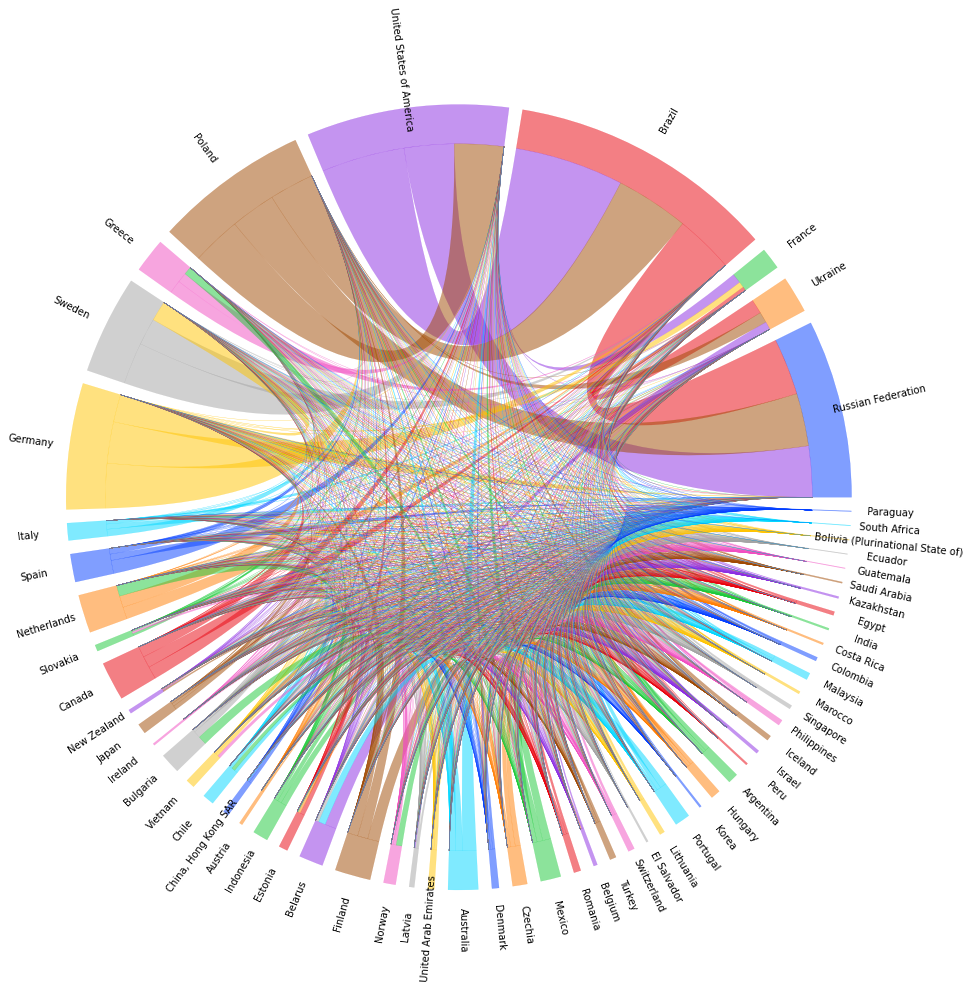

In [22]:
from matplotlib_chord import chordDiagram, hex2rgb
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns


def generate_chord_plot(df):
    X= df.to_numpy()
    
    ax = plt.axes([0,0,2,3])

    nodePos = chordDiagram(X, ax, colors=sns.color_palette("bright", df.shape[0]))
    ax.axis('off')
    prop = dict(fontsize=5*2, ha='center', va='center')
    
    nodes = df.index
    for i in range(len(nodes)):
        if nodePos[i][2]<= 0:
            ax.text(nodePos[i][0], nodePos[i][1], nodes[i], rotation=nodePos[i][2]+90, **prop)
        else:
            ax.text(nodePos[i][0], nodePos[i][1], nodes[i], rotation=nodePos[i][2]-90, **prop)
            
    
    ax.plot()
    
generate_chord_plot(OD_matrix_T_largest_df)

In [23]:
print("That's all folks!")

That's all folks!
